In [1]:
import tlc
from cleanvision import Imagelab

PROJECT_NAME = "chessvision-classification"
RUN_NAME = "base-run"

run = tlc.init(PROJECT_NAME, RUN_NAME, if_exists="reuse")

for table_name, dataset_name in [("train", "chesspieces-train"), ("val", "chesspieces-val")]:
    table = tlc.Table.from_names(table_name, dataset_name, PROJECT_NAME)
    imagelab = Imagelab(torchvision_dataset=table)
    imagelab.find_issues()
    imagelab_issues = imagelab.issues.to_dict(orient="list")
    run.add_metrics_data(imagelab_issues, input_table_url=table.url)

run.set_status_completed()

3lc: Reusing existing run at C:/Users/gudbrand/AppData/Local/3LC/3LC/projects/chessvision-classification/runs/base-run
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/8931 [00:00<?, ?it/s]

  0%|          | 0/8931 [00:00<?, ?it/s]

Issue checks completed. 9474 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/2134 [00:00<?, ?it/s]

  0%|          | 0/2134 [00:00<?, ?it/s]

Issue checks completed. 2226 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


Removing grayscale from potential issues in the dataset as it exceeds max_prevalence=0.5 
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  1 | low_information  |           51 |
|  2 | near_duplicates  |           30 |
|  3 | exact_duplicates |           10 |
|  4 | light            |            1 |
|  5 | dark             |            0 |
|  6 | odd_aspect_ratio |            0 |
|  7 | blurry           |            0 |
|  8 | odd_size         |            0 | 

------------------ low_information images ------------------

Number of examples with this issue: 51
Examples representing most severe instances of this issue:



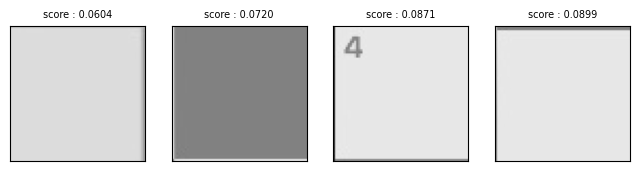

------------------ near_duplicates images ------------------

Number of examples with this issue: 30
Examples representing most severe instances of this issue:

Set: 0


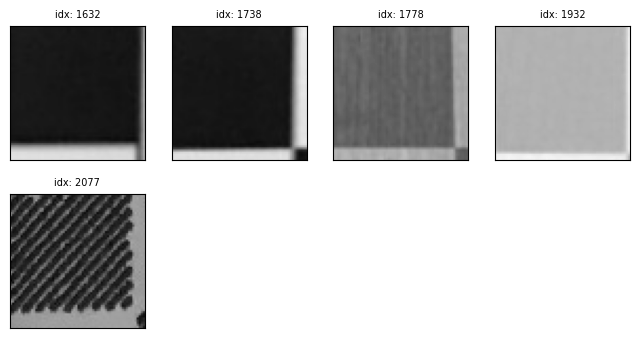

Set: 1


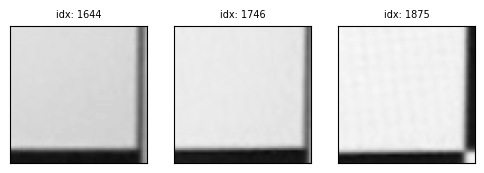

Set: 2


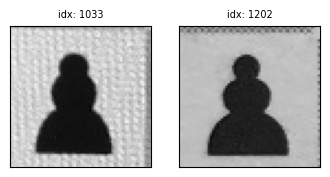

Set: 3


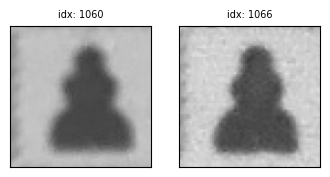

----------------- exact_duplicates images ------------------

Number of examples with this issue: 10
Examples representing most severe instances of this issue:

Set: 0


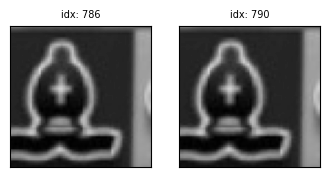

Set: 1


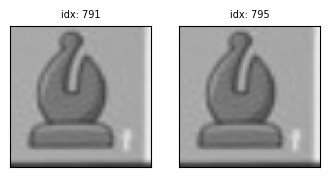

Set: 2


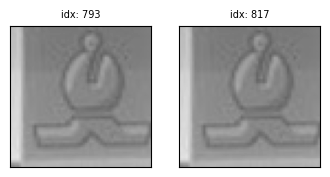

Set: 3


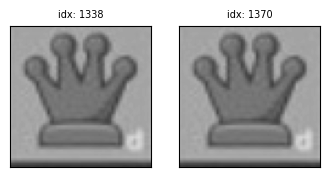

----------------------- light images -----------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



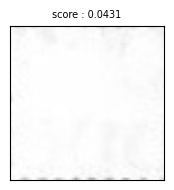

In [2]:
imagelab.report()

In [3]:
imagelab.issues.head()

,odd_size_score,is_odd_size_issue,odd_aspect_ratio_score,is_odd_aspect_ratio_issue,low_information_score,is_low_information_issue,light_score,is_light_issue,grayscale_score,is_grayscale_issue,dark_score,is_dark_issue,blurry_score,is_blurry_issue,exact_duplicates_score,is_exact_duplicates_issue,near_duplicates_score,is_near_duplicates_issue
0,1.0,False,1.0,False,0.653166,False,0.619608,False,0,True,0.890196,False,0.688784,False,1.0,False,1.0,False
1,1.0,False,1.0,False,0.645342,False,0.803922,False,0,True,0.686275,False,0.672474,False,1.0,False,1.0,False
2,1.0,False,1.0,False,0.695282,False,0.909804,False,0,True,0.705882,False,0.795129,False,1.0,False,1.0,False
3,1.0,False,1.0,False,0.701234,False,0.776471,False,0,True,0.752941,False,0.538615,False,1.0,False,1.0,False
4,1.0,False,1.0,False,0.603207,False,0.734314,False,0,True,0.870588,False,0.894936,False,1.0,False,1.0,False


In [4]:
imagelab.list_default_issue_types()

['dark',
 'light',
 'odd_aspect_ratio',
 'low_information',
 'exact_duplicates',
 'near_duplicates',
 'blurry',
 'grayscale',
 'odd_size']

In [5]:
imagelab.info

{'statistics': {'brightness': count    2134.000000
  mean        0.564166
  std         0.150377
  min         0.179750
  25%         0.456924
  50%         0.565226
  75%         0.662459
  max         0.982458
  Name: brightness, dtype: float64,
  'aspect_ratio': count    2134.0
  mean        1.0
  std         0.0
  min         1.0
  25%         1.0
  50%         1.0
  75%         1.0
  max         1.0
  Name: aspect_ratio, dtype: float64,
  'entropy': count    2134.000000
  mean        6.113824
  std         1.137529
  min         0.604133
  25%         5.752370
  50%         6.440996
  75%         6.866542
  max         7.653889
  Name: entropy, dtype: float64,
  'blurriness': count    2134.000000
  mean       62.704621
  std        18.255129
  min        19.741108
  25%        47.826438
  50%        61.156215
  75%        75.932685
  max       117.057652
  Name: blurriness, dtype: float64,
  'color_space': count     2134
  unique       1
  top          L
  freq      2134
  Name: c